# Dictionaries

Key Features:

- **track_name:** Name of the song

- **artist(s)_name:** Name of the artist(s) of the song

- **artist_count:** Number of artists contributing to the song

- **released_year:** Year when the song was released

- **released_month:** Month when the song was released

- **released_day:** Day of the month when the song was released

- **in_spotify_playlists:** Number of Spotify playlists the song is included in

- **in_spotify_charts:** Presence and rank of the song on Spotify charts

- **streams:** Total number of streams on Spotify

- **in_apple_playlists:** Number of Apple Music playlists the song is included in

- **in_apple_charts:** Presence and rank of the song on Apple Music charts

- **in_deezer_playlists:** Number of Deezer playlists the song is included in

- **in_deezer_charts:** Presence and rank of the song on Deezer charts

- **in_shazam_charts:** Presence and rank of the song on Shazam charts

- **bpm:** Beats per minute, a measure of song tempo

- **key:** Key of the song

- **mode:** Mode of the song (major or minor)

- **danceability_%:** Percentage indicating how suitable the song is for dancing

- **valence_%:** Positivity of the song's musical content

- **energy_%:** Perceived energy level of the song

- **acousticness_%:** Amount of acoustic sound in the song

- **instrumentalness_%:** Amount of instrumental content in the song

- **liveness_%:** Presence of live performance elements

- **speechiness_%:** Amount of spoken words in the song

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import modeling tools
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

## Load Dataset

In [2]:
df = pd.read_csv('Data/spotify-2023_2.csv', encoding='latin-1')

In [3]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
## Display the number of columns and rows
df.shape
print(f'There are {df.shape [0]} rows and {df.shape [1]} columns in the dataset.')

There are 953 rows and 24 columns in the dataset.


## Data Cleaning

In [6]:
# Dropping unnecessary columns
columns_to_drop = ['mode', 'bpm', 'key']
df.drop(columns_to_drop, axis=1, inplace=True)

In [7]:
# viewing column info to verify the drop
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  danceability_%        953 non-null    int64 
 15  valence_%             953 non-null    in

### Duplicates

In [8]:
#Check for duplicates
print(f'There are {df.duplicated().sum()} duplicates.')

There are 0 duplicates.


### Missing Values

In [9]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 50 missing values.


In [10]:
# view missing values
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

- We would fix the missing values

In [11]:
# Checking nuniuqe categories
df.select_dtypes('object').nunique()

track_name             943
artist(s)_name         645
streams                949
in_deezer_playlists    348
in_shazam_charts       198
dtype: int64

In [12]:
# Check data types
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

- There looks to be a problem in our streams column. Let's check it out and fix it if need be.

In [13]:
df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',','')

# Fill NaN values with 0 in the 'in_shazam_charts' column
df['in_shazam_charts'].fillna(0, inplace=True)
# Convert the 'in_shazam_charts' column to integers
df['in_shazam_charts'] = df['in_shazam_charts'].astype(int)

# Convert the 'in_deezer_playlists' column to integers
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '')
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype(int)

In [14]:
# Remove non-numeric characters from the 'streams' column
df['streams'] = df['streams'].str.replace(r'\D', '', regex=True)

In [15]:
#Coverting streams into float
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [16]:
# verify our streams column was fixed

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    int64 
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    int64 
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    int64 
 14  danceability_%        953 non-null    int64 
 15  valence_%             953 non-null    in

In [17]:
# Check for impossible values
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.530000e+02,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,1.211250e+10,67.812172,51.908709,385.187828,2.666317,56.847849,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,3.580501e+11,86.441493,50.630241,1130.535561,6.035599,157.441749,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.417210e+08,13.000000,7.000000,13.000000,0.000000,0.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.908332e+08,34.000000,38.000000,44.000000,0.000000,2.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.740727e+08,88.000000,87.000000,164.000000,2.000000,33.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,1.105376e+13,672.000000,275.000000,12367.000000,58.000000,1451.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [18]:
df.drop(574, inplace=True)

In [19]:
# Check for impossible values for categorical columns
df.describe(include='object')

,track_name,artist(s)_name
count,952,952
unique,942,644
top,Take My Breath,Taylor Swift
freq,2,34


# EDA

In [20]:
top_artists = df['artist(s)_name'].value_counts().head(10)

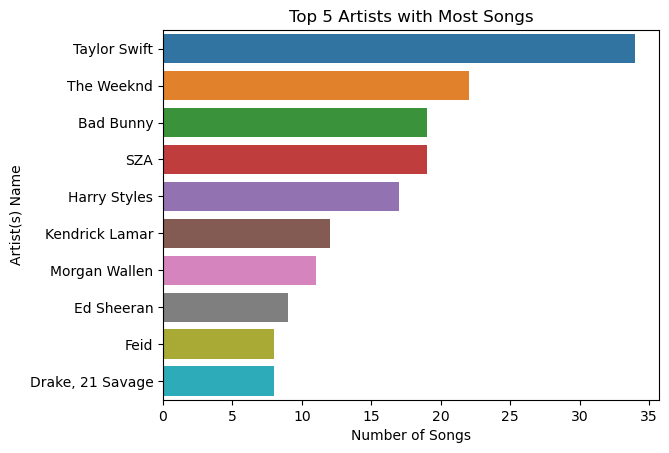

In [21]:
# using an sns countplot to show the the artist with the most songs/instrumentals
sns.barplot(x=top_artists.values, y=top_artists.index, data=df)
plt.xlabel('Number of Songs')
plt.ylabel('Artist(s) Name')
plt.title('Top 5 Artists with Most Songs');

- As seen in the above graph, Taylor Swift is leading the chart with 34 tracks
- Coming second place is the weeknd with 22 tracks
- Harry Styles takes fifth with 18
- BTS and Feid are both 9 & 10 respectively with 8 tracks
- Taylor Swift's numbers are increasingly high considering other artists are relatively close to each other or on the same level like Bad Bunny and SZA

In [22]:
# listing the top 10 most streamed songs 
most_streams = df[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(10)
most_streams

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3703895074
179,Shape of You,Ed Sheeran,3562543890
86,Someone You Loved,Lewis Capaldi,2887241814
620,Dance Monkey,Tones and I,2864791672
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2808096550
162,One Dance,"Drake, WizKid, Kyla",2713922350
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2665343922
140,Believer,Imagine Dragons,2594040133
725,Closer,"The Chainsmokers, Halsey",2591224264
48,Starboy,"The Weeknd, Daft Punk",2565529693


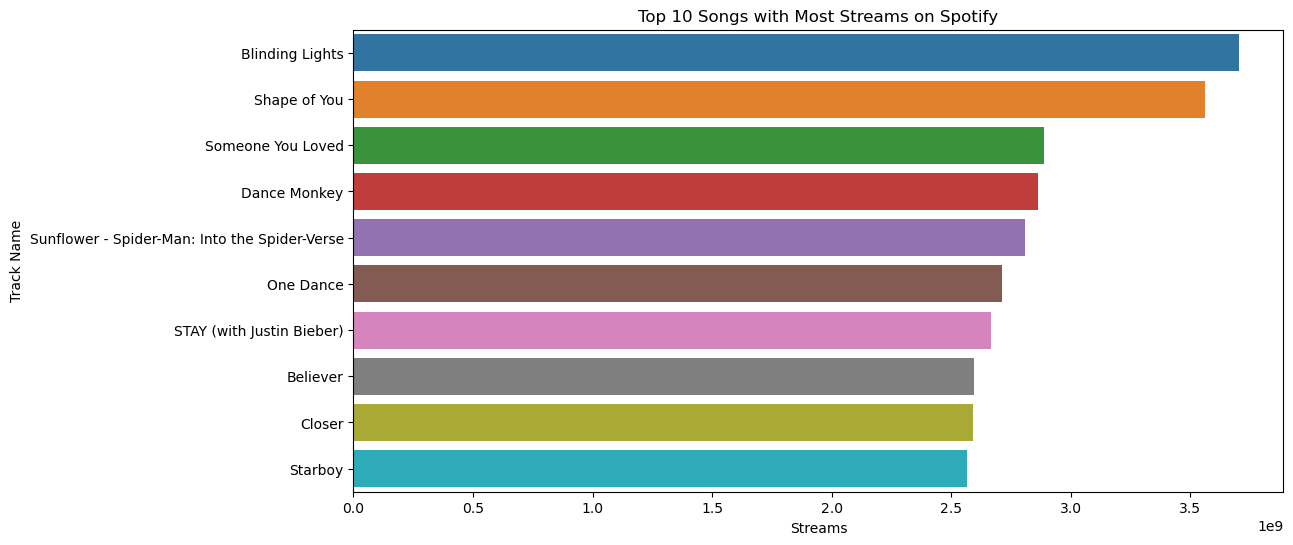

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x=most_streams['streams'], y=most_streams['track_name'])
plt.xlabel('Streams')
plt.ylabel('Track Name')
plt.title('Top 10 Songs with Most Streams on Spotify');

- Blinding lights by The Weeknd is leading the list with 3.70 billion streams

In [24]:
# viewing the top 10 songs from spotify platform and comparing it to other musical platforms
spotify_playlists = df[['artist(s)_name', 'track_name', 'in_spotify_playlists', 'streams']].sort_values('in_spotify_playlists', ascending = False)[:10]
spotify_playlists

,artist(s)_name,track_name,in_spotify_playlists,streams
757,"Pharrell Williams, Nile Rodgers, Daft Punk",Get Lucky - Radio Edit,52898,933815613
630,The Killers,Mr. Brightside,51979,1806617704
720,Avicii,Wake Me Up - Radio Edit,50887,1970673297
624,Nirvana,Smells Like Teen Spirit - Remastered 2021,49991,1690192927
199,a-ha,Take On Me,44927,1479115056
55,The Weeknd,Blinding Lights,43899,3703895074
162,"Drake, WizKid, Kyla",One Dance,43257,2713922350
727,"Gotye, Kimbra",Somebody That I Used To Know,42798,1457139296
114,Tears For Fears,Everybody Wants To Rule The World,41751,1205951614
871,Guns N' Roses,Sweet Child O' Mine,41231,1553497987


Text(0.5, 1.0, 'Top 10 Artists with Most Entries in Spotify Playlists')

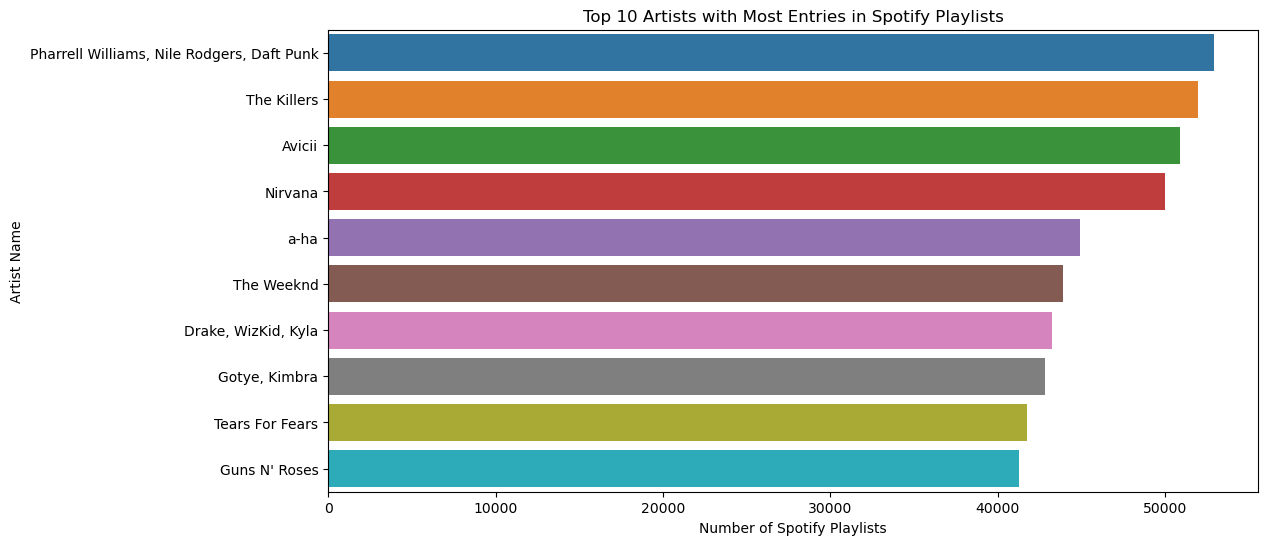

In [25]:
# set the figure size
plt.figure(figsize=(12, 6))
# Create the bar plot
sns.barplot(x='in_spotify_playlists', y='artist(s)_name', data=spotify_playlists, orient='h')
plt.xlabel('Number of Spotify Playlists')
plt.ylabel('Artist Name')
plt.title('Top 10 Artists with Most Entries in Spotify Playlists')

In [26]:
# viewing the top 10 songs from apple platform and comparing it to other musical platforms
apple_playlist = df[['artist(s)_name','in_apple_playlists', 'streams']].sort_values('in_apple_playlists', ascending = False)[:10]
apple_playlist

,artist(s)_name,in_apple_playlists,streams
55,The Weeknd,672,3703895074
403,"Calvin Harris, Dua Lipa",537,1897517891
620,Tones and I,533,2864791672
407,Dua Lipa,532,2303033973
84,"Justin Bieber, The Kid Laroi",492,2665343922
693,"Shawn Mendes, Camila Cabello",453,2484812918
86,Lewis Capaldi,440,2887241814
127,Harry Styles,437,2322580122
162,"Drake, WizKid, Kyla",433,2713922350
14,Harry Styles,403,2513188493


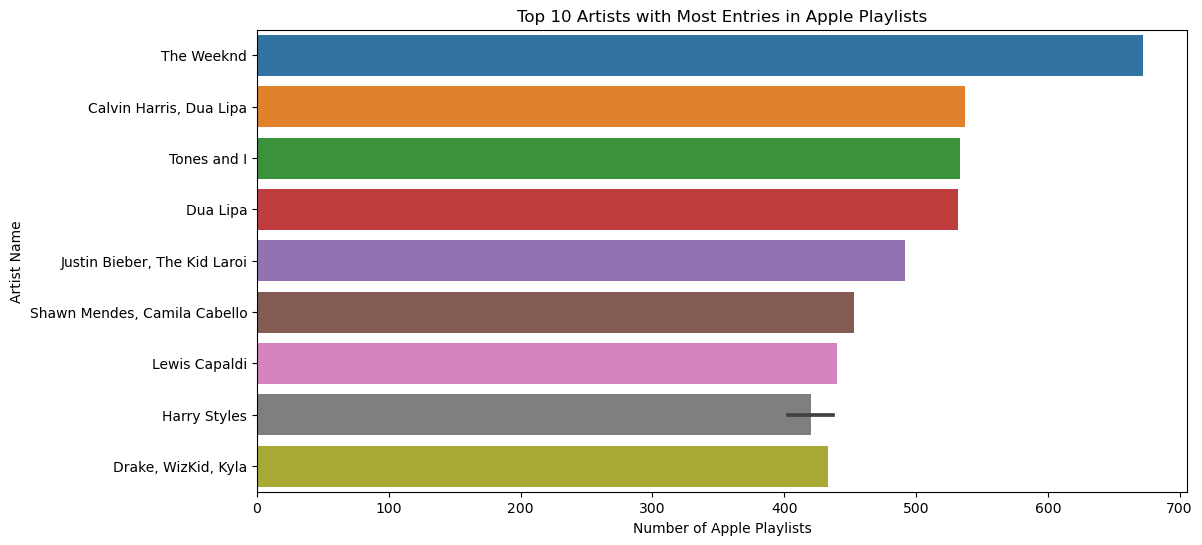

In [27]:
# set the figure size
plt.figure(figsize=(12, 6))
# Create the bar plot
sns.barplot(x='in_apple_playlists', y='artist(s)_name', data=apple_playlist, orient='h')
plt.xlabel('Number of Apple Playlists')
plt.ylabel('Artist Name')
plt.title('Top 10 Artists with Most Entries in Apple Playlists')
plt.show()

In [28]:
# viewing the top 10 songs from deezer platform and comparing it to other musical platforms
deezer_playlist = df[['artist(s)_name','in_deezer_playlists', 'streams']].sort_values('in_deezer_playlists', ascending = False)[:10]
deezer_playlist

,artist(s)_name,in_deezer_playlists,streams
624,Nirvana,12367,1690192927
757,"Pharrell Williams, Nile Rodgers, Daft Punk",8215,933815613
910,Coldplay,7827,1608164312
331,Linkin Park,7341,1361425037
358,Linkin Park,6808,1624165576
179,Ed Sheeran,6808,3562543890
182,Radiohead,6807,1271293243
871,Guns N' Roses,6720,1553497987
649,"Dr. Dre, Snoop Dogg",6591,1210599487
126,"Ray Dalton, Ryan Lewis, Macklemore",6551,1953533826


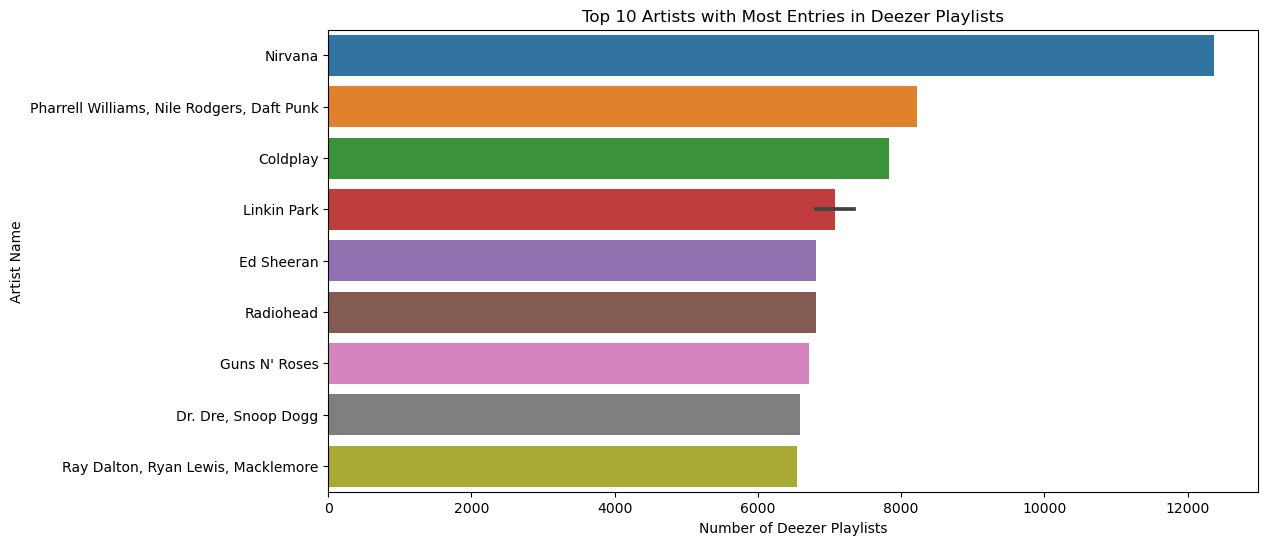

In [29]:
# set the figure size
plt.figure(figsize=(12, 6))
# Create the bar plot
sns.barplot(x='in_deezer_playlists', y='artist(s)_name', data=deezer_playlist, orient='h')
plt.xlabel('Number of Deezer Playlists')
plt.ylabel('Artist Name')
plt.title('Top 10 Artists with Most Entries in Deezer Playlists')
plt.show()

In [30]:
in_deezer_charts = df[['artist(s)_name', 'in_deezer_charts', 'streams']].sort_values('in_deezer_charts', ascending = False)[:5].reset_index()
in_deezer_charts

,index,artist(s)_name,in_deezer_charts,streams
0,12,Miley Cyrus,58,1316855716
1,14,Harry Styles,46,2513188493
2,42,"Bebe Rexha, David Guetta",45,1109433169
3,26,"Rï¿½ï¿½ma, Selena G",38,899183384
4,29,Dua Lipa,38,127408954


In [31]:
in_spotify_charts = df[['artist(s)_name', 'in_spotify_charts', 'streams']].sort_values('in_spotify_charts', ascending = False)[:5].reset_index()
in_spotify_charts

,index,artist(s)_name,in_spotify_charts,streams
0,0,"Latto, Jung Kook",147,141381703
1,14,Harry Styles,130,2513188493
2,12,Miley Cyrus,115,1316855716
3,2,Olivia Rodrigo,113,140003974
4,22,Arctic Monkeys,110,1297026226


In [32]:
in_apple_charts = df[['artist(s)_name', 'in_apple_charts', 'streams']].sort_values('in_apple_charts', ascending = False)[:5].reset_index()
in_apple_charts

,index,artist(s)_name,in_apple_charts,streams
0,872,Burna Boy,275,293466523
1,888,Ghost,266,387080183
2,0,"Latto, Jung Kook",263,141381703
3,17,Billie Eilish,227,30546883
4,6,"Eslabon Armado, Peso Pluma",222,725980112


In [33]:
in_shazam_charts = df[['artist(s)_name', 'in_shazam_charts', 'streams']].sort_values('in_shazam_charts', ascending = False)[:5].reset_index()
in_shazam_charts

,index,artist(s)_name,in_shazam_charts,streams
0,88,Jain,1451,165484133
1,13,David Kushner,1281,387570742
2,17,Billie Eilish,1173,30546883
3,89,"Ayparia, unxbected",1170,58054811
4,44,"Nicki Minaj, Aqua, Ice Spice",1133,65156199


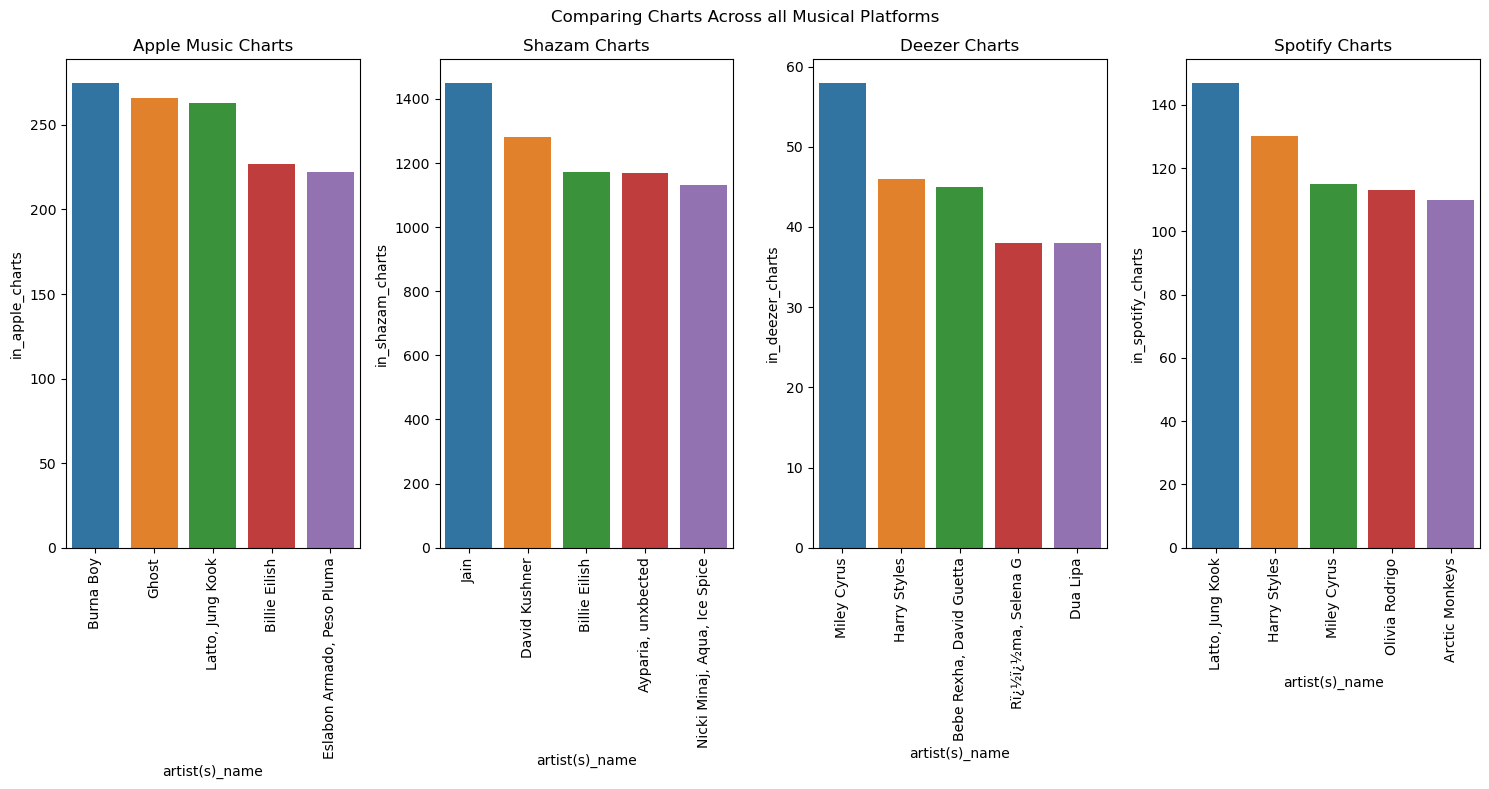

In [34]:
## Creating subplots with 1 rows and 4 columns, sharing the x-axis
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,8))

sns.barplot(data=in_apple_charts, x='artist(s)_name', y="in_apple_charts", ax=axes[0])
axes[0].set_title('Apple Music Charts', fontsize =12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
## Figure title and fixing overlap
fig.suptitle("Comparing Charts Across all Musical Platforms")
fig.tight_layout()

sns.barplot(data=in_shazam_charts, x='artist(s)_name', y="in_shazam_charts", ax=axes[1])
axes[1].set_title('Shazam Charts', fontsize = 12)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
## Figure title and fixing overlap
fig.suptitle("Comparing Charts Across all Musical Platforms")
fig.tight_layout()

sns.barplot(data=in_deezer_charts, x='artist(s)_name', y="in_deezer_charts", ax=axes[2])
axes[2].set_title('Deezer Charts', fontsize = 12)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
## Figure title and fixing overlap
fig.suptitle("Comparing Charts Across all Musical Platforms")
fig.tight_layout()

sns.barplot(data=in_spotify_charts, x='artist(s)_name', y="in_spotify_charts", ax=axes[3])
axes[3].set_title('Spotify Charts', fontsize = 12)
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=90)
## Figure title and fixing overlap
fig.suptitle("Comparing Charts Across all Musical Platforms")
fig.tight_layout();

In [35]:
most_danceability = df[['track_name',  'artist(s)_name', 'danceability_%', 'streams']].sort_values(by='danceability_%', ascending=False).head(10)
most_danceability

,track_name,artist(s)_name,danceability_%,streams
595,Peru,"Ed Sheeran, Fireboy DML",96,261286503
224,Players,Coi Leray,95,335074782
250,The Real Slim Shady,Eminem,95,1424589568
423,Super Freaky Girl,Nicki Minaj,95,428685680
702,Starlight,Dave,95,229473310
321,CAIRO,"Karol G, Ovy On The Drums",95,294352144
876,Ai Preto,"L7nnon, DJ Biel do Furduncinho, Bianca",95,176103902
268,Slut Me Out,NLE Choppa,94,190490915
943,Privileged Rappers,"Drake, 21 Savage",93,112436403
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",93,11956641


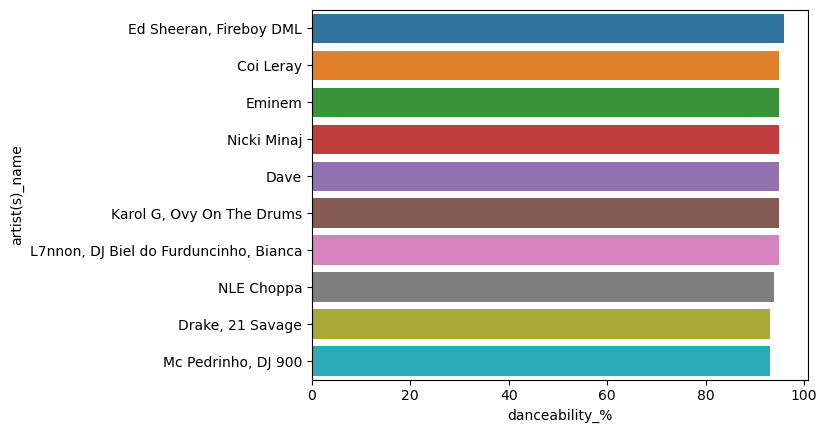

In [36]:
sns.barplot(y = 'artist(s)_name' , x = 'danceability_%',data =  most_danceability)
plt.show()

In [37]:
most_vibes = df[['track_name',  'artist(s)_name', 'energy_%', 'streams']].sort_values(by='energy_%', ascending=False).head(10)
most_vibes

,track_name,artist(s)_name,energy_%,streams
42,I'm Good (Blue),"Bebe Rexha, David Guetta",97,1109433169
319,Murder In My Mind,Kordhell,97,448843705
795,That That (prod. & feat. SUGA of BTS),"PSY, Suga",96,212109195
60,Tï¿½ï¿,"dennis, MC Kevin o Chris",96,111947664
367,Bombonzinho - Ao Vivo,"Israel & Rodolffo, Ana Castela",95,263453310
174,ýýýýýýýýýýýý,YOASOBI,94,143573775
475,Merry Christmas,"Ed Sheeran, Elton John",94,135723538
552,Every Angel is Terrifying,The Weeknd,94,37307967
430,KICK BACK,Kenshi Yonezu,94,210038833
579,Freaks,Surf Curse,94,824420218


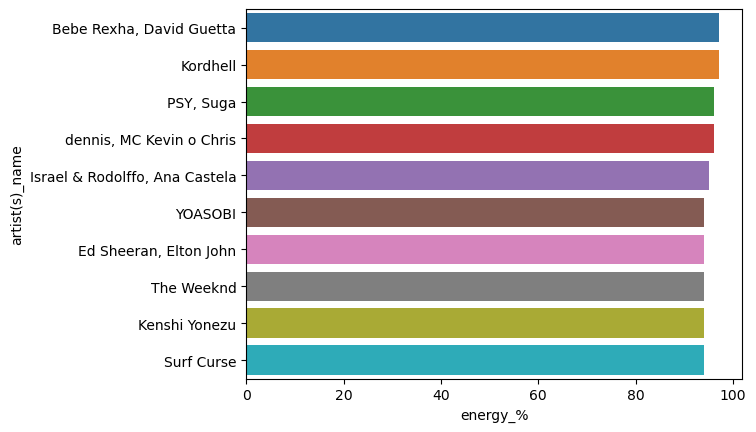

In [38]:
sns.barplot(y = 'artist(s)_name' , x = 'energy_%',data =  most_vibes)
plt.show()

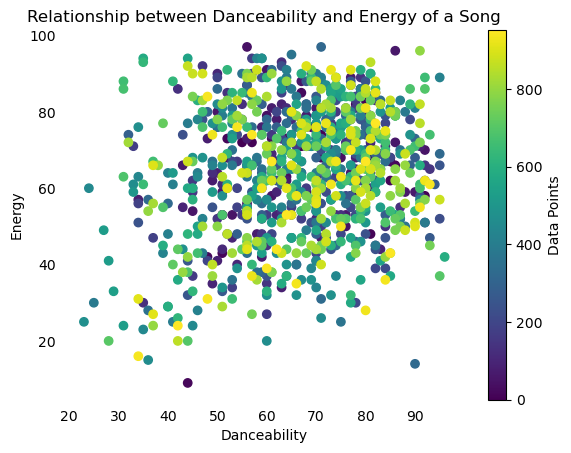

In [49]:
# Using different colors for each column
fig, ax = plt.subplots()
scatter = ax.scatter(df['danceability_%'], df['energy_%'], c=range(len(df)), cmap='viridis')

# Adding labels and title
ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')
ax.set_title('Relationship between Danceability and Energy of a Song')

# Adding a color bar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Data Points')

#remove spines
for location in ['top','bottom','left','right']:
    ax.spines[location].set_visible(False)
    
#remove x and y ticks
ax.tick_params(bottom=False,left=False);

- There are no clear relationship between our song danceability and energy
- Let's check a particular artist's song energy and their danceability

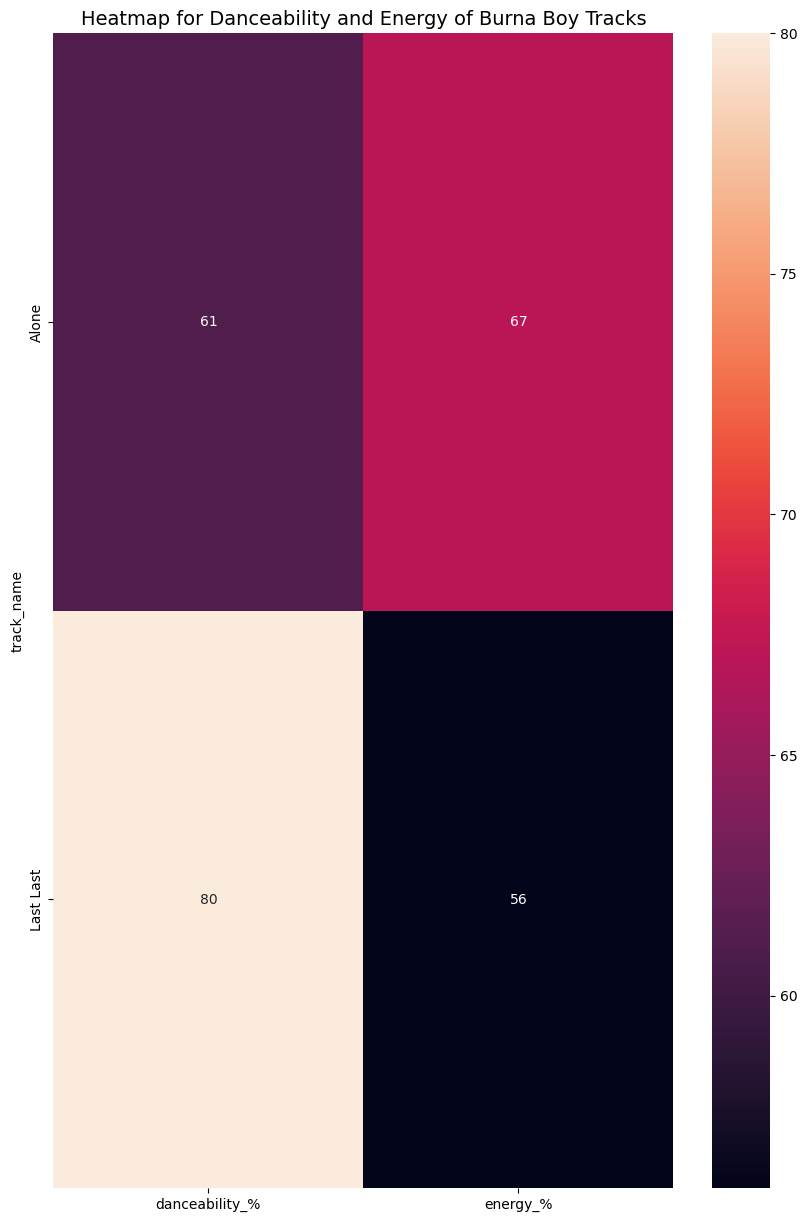

In [48]:
data = df[['track_name', 'danceability_%', 'energy_%']][df['artist(s)_name'].str.contains ('Burna Boy')]

# Using pivot_table to pivot the data by 'track_name'
pivot_df = pd.pivot_table(data, values=['danceability_%', 'energy_%'], index='track_name')

# Increasing the size of the heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(pivot_df, annot=True)

plt.title('Heatmap for Danceability and Energy of Burna Boy Tracks', fontsize=14);

- Went with Bad Bunny becaus ehe had a lot of tracks and he was known to have a lot of vibes in his songs
- Although, not much of his songs were energetic and danceable to, most were either one pof each

In [41]:
#Filtering out data of between 2020 and 2023
filtered_songs = df[(df['released_year'] >= 2020) & (df['released_year'] <= 2023)]

In [42]:
song_counts_by_year = filtered_songs['released_year'].value_counts().sort_index()

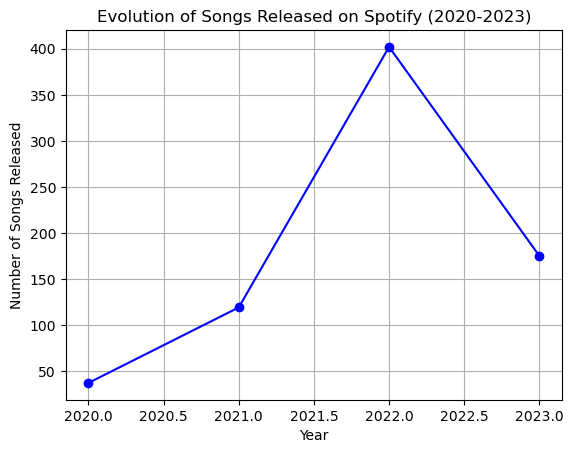

In [43]:
plt.plot(song_counts_by_year.index, song_counts_by_year.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.title('Evolution of Songs Released on Spotify (2020-2023)')
plt.grid(True)

- there were a lot of changes and differences in the evolutions of songs released before and after covid 

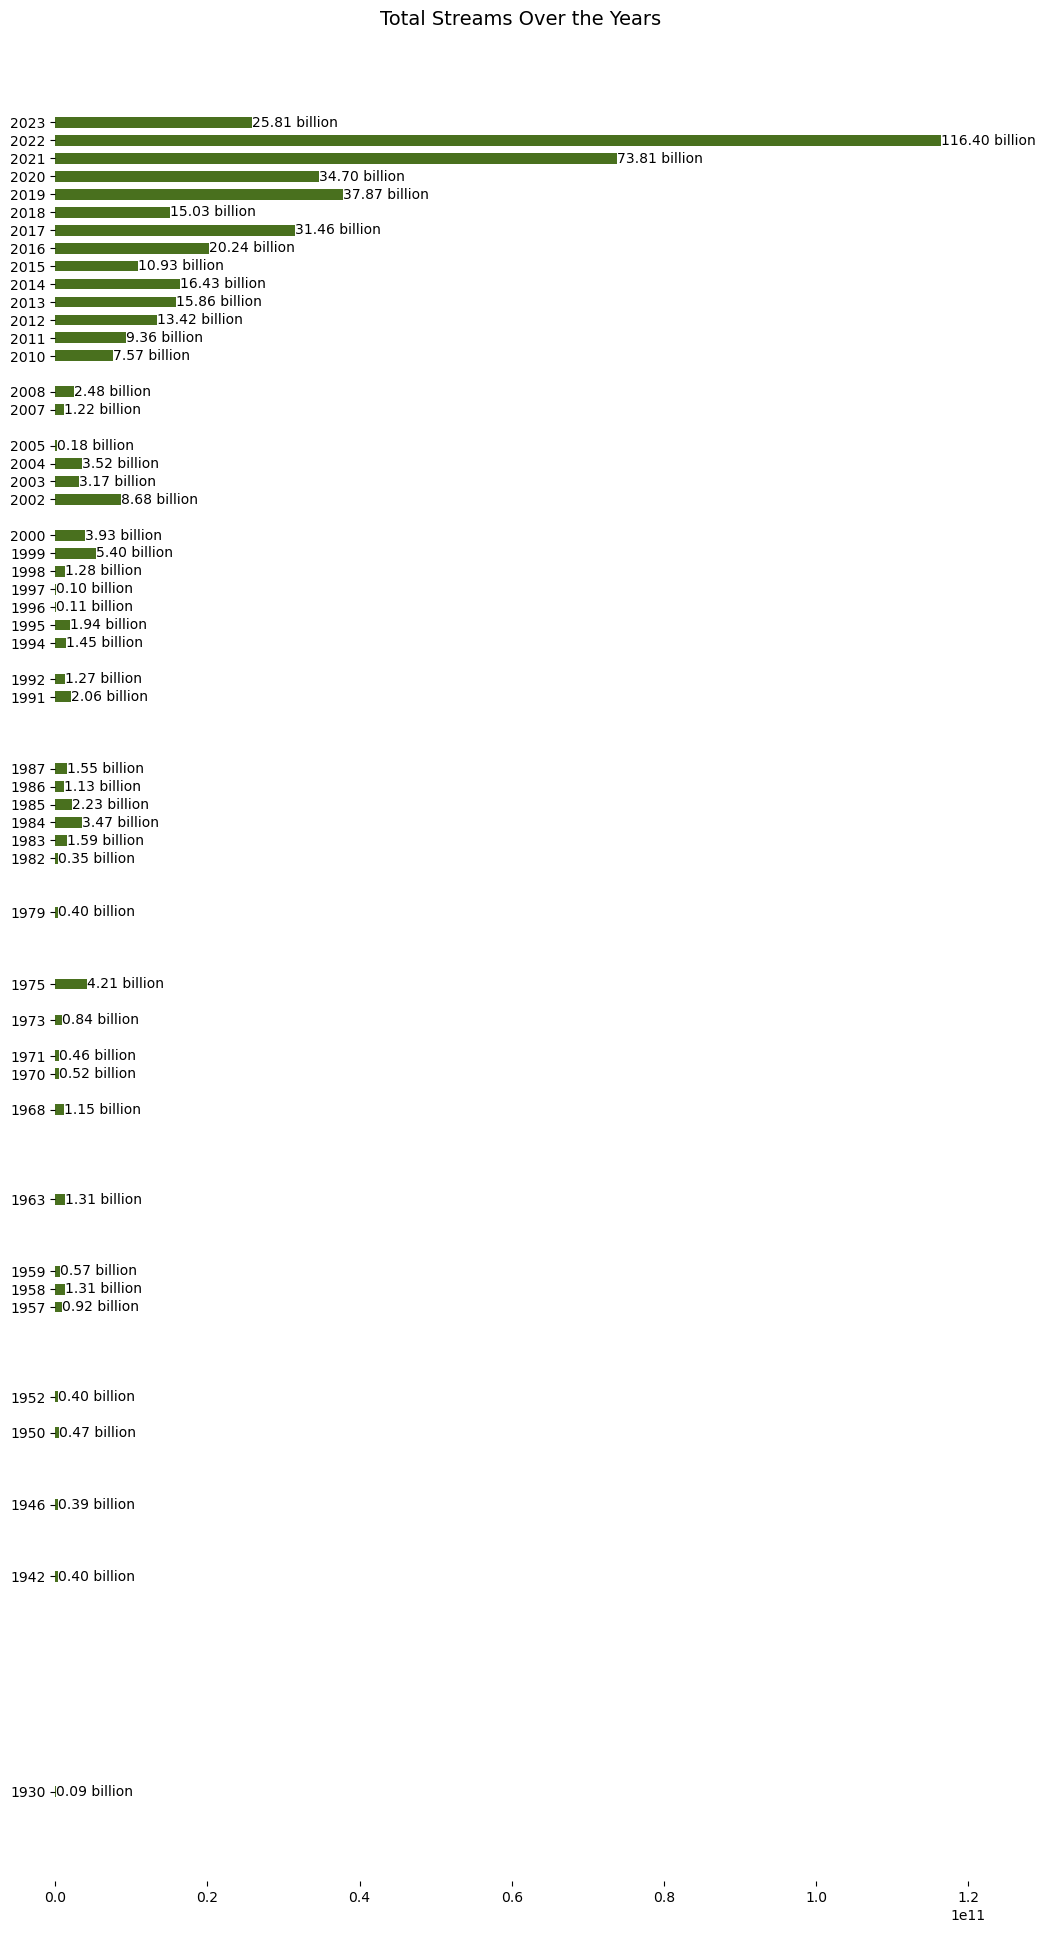

In [44]:
# Grouping the data by 'released_year' and calculating the total streams for each year
streams_by_year = df.groupby('released_year')['streams'].sum()

fig,ax = plt.subplots(figsize=(12,24))
bar_container = ax.barh(streams_by_year.index,streams_by_year,height=0.6,color='#49701e')
ax.bar_label(bar_container, fmt=lambda x: f'{x / 10**9:.2f} billion')

# Show all the years on the y-axis
ax.set_yticks(streams_by_year.index)
ax.set_yticklabels(streams_by_year.index)

#remove spines
for location in ['top','bottom','left','right']:
    ax.spines[location].set_visible(False)
    

#set titles
ax.set_title('Total Streams Over the Years',fontsize=14);

In [46]:

#Filtering out data of songs released in 2022
songs_2022 = df(df['released_year'] == 2022)

TypeError: 'DataFrame' object is not callable

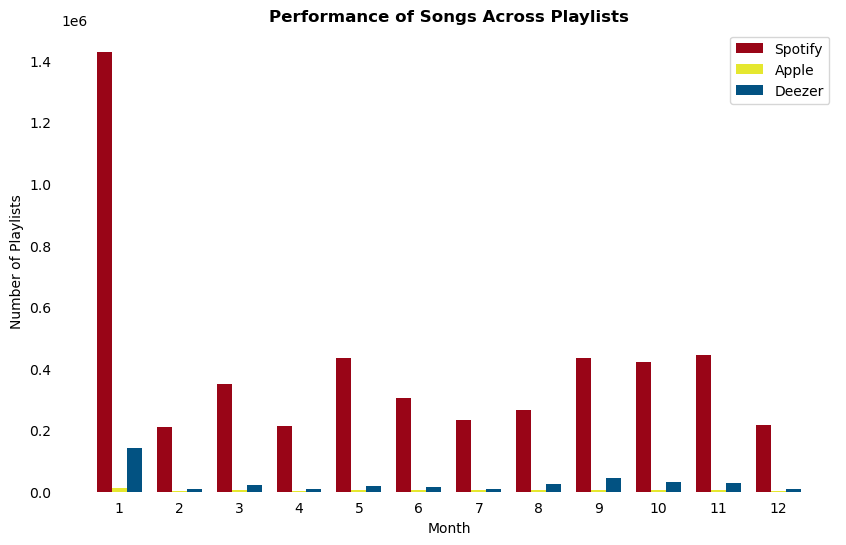

In [ ]:
# Grouping the data 
playlist_by_month = df.groupby('released_month')[['in_spotify_playlists',
                                            'in_apple_playlists','in_deezer_playlists']].sum()

# Create the index for the bars
months = playlist_by_month.index

# Define the bar width
bar_width = 0.25

# Set position of bar on X axis
r1 = np.arange(len(months))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(r1, playlist_by_month['in_spotify_playlists'], color='#990517', width=bar_width, label='Spotify')
ax.bar(r2, playlist_by_month['in_apple_playlists'], color='#e5e72f', width=bar_width, label='Apple')
ax.bar(r3, playlist_by_month['in_deezer_playlists'], color='#025282', width=bar_width, label='Deezer')

# Add labels and title
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Number of Playlists', fontsize=10)
ax.set_title('Performance of Songs Across Playlists', fontweight='bold', fontsize=12)
ax.set_xticks([r + bar_width for r in range(len(months))])
ax.set_xticklabels(months)
ax.legend()

#remove spines
for location in ['top','bottom','left','right']:
    ax.spines[location].set_visible(False)
    
#remove x and y ticks
ax.tick_params(bottom=False,left=False)
#ax.set_xticks([])  # Remove x-ticks

- January seems like the best month to release a song so it could be most likely streamed across all platforms